## Get data

In [14]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 16
import wandb

In [4]:
ids = ["afr86ups", # No Param
       "i8kkltwu", # TrainAll_GoodInit
       "csrhdpbd", # OnlyB_GoodInit
       ]

In [5]:
api = wandb.Api()

In [6]:
runs = [api.run(f"Jorgvt/PerceptNet_v15/{id}") for id in ids]
len(runs)

True
True
True


3

In [7]:
cols = ["train_loss", "val_loss"]
config_keys = ["PARAM_CS", "PARAM_DN_CS", "PARAM_GABOR", "PARAM_DN_FINAL", "FINAL_B"]

In [8]:
def get_name(name):
    if name == "No_Param":
        return "Non Parametric"
    elif "TrainAll" in name:
        return "Parametric Fully Trained"
    elif "OnlyB" in name:
        return "Parametric Bio Fitted"

In [9]:
names = ["Non-Param", "Param-Fully", "Param-Partial"]

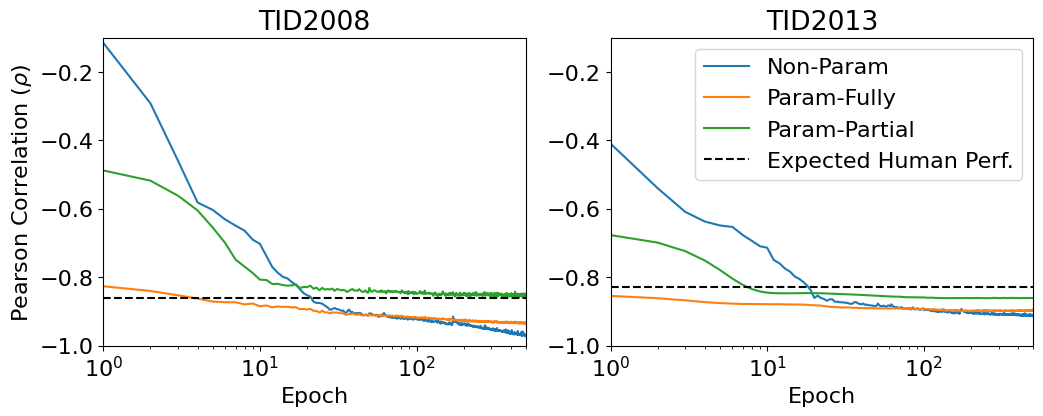

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
for name, run in zip(names, runs):
    ## Fetch data
    # name = get_name(run.name)
    history = run.history()[cols]
    history["epoch"] = range(len(history))
    ## Plot the data
    axes[0].plot(history.epoch, history.train_loss, label=name)
    axes[0].set_title("TID2008")
    axes[1].plot(history.epoch, history.val_loss, label=name)
    axes[1].set_title("TID2013")

for ax, th in zip(axes, [-0.86, -0.83]):
    ax.axhline(th, color="k", linestyle='--', label=r"Expected Human Perf.")
    ax.set_ylim([-1, -0.1])
    ax.set_xscale("log")
    ax.set_xlim([1,500])

axes[0].set_ylabel(r"Pearson Correlation ($\rho$)")
axes[0].set_xlabel("Epoch")
axes[1].set_xlabel("Epoch")

plt.legend()
plt.savefig("learning_curves.png", dpi=300, bbox_inches='tight')
plt.show()